In [1]:
train_data = '/mnt/dataset/train-valid_set'
inference_data = '/mnt/dataset/test_set'

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math

file_list = os.listdir(train_data)

In [3]:
file_list

['Suction Irrigator (SIRL-UCUK)',
 'R-Scissors (da Vinci) (MSCR-UCDV)',
 'Needle Holder (AESCULAP) (NDHL-UCAE)',
 'Graspers (straight) (OLYMPUS) (GRSL-UCOL)',
 'Metal Clip Applier (Medtronic) (CLAL-M3MT)',
 'R-Maryland (da Vinci) (BFCR-MADV)',
 'R-LND (da Vinci) (NDDR-LADV)',
 'Prograsp (da Vinci) (GRSR-UCDV)',
 'Polymer Clip Applier (CLAL-UCUK)']

In [4]:
class_list = ['Prograsp (da Vinci) (GRSR-UCDV)',
              'R-LND (da Vinci) (NDDR-LADV)',
              'R-Maryland (da Vinci) (BFCR-MADV)',
              'R-Scissors (da Vinci) (MSCR-UCDV)',
              'Suction Irrigator (SIRL-UCUK)',
              'Graspers (straight) (OLYMPUS) (GRSL-UCOL)',
              'Needle Holder (AESCULAP) (NDHL-UCAE)',
              'Metal Clip Applier (Medtronic) (CLAL-M3MT)',
              'Polymer Clip Applier (CLAL-UCUK)'
             ]

In [5]:
import json

def getjson(json_path):
    with open(json_path) as json_file:
        json_data = json.load(json_file)
    return json_data

In [6]:
# 근데 이미지 하나당 수술도구 하나씩 나오니까
# 처음부터 데이터를 전부 읽어와서 리스트 하나로 만들어봤어

# all_data 는 모든 json file 리스트
# data_dic 는 key 값이 수술도구, value가 json file인 딕셔너리

all_data = []
data_dic = {}

for tool in class_list:
    files = os.listdir(train_data+'/'+tool)
    json_files = [file for file in files if file.endswith(".json")]
    
    all_data.extend(json_files)
    data_dic[tool] = json_files

len(all_data) # 모든 json file은 12408개

12408

In [7]:
# 근데 이미지 하나당 수술도구 하나씩 나오니까
# 처음부터 데이터를 전부 읽어와서 리스트 하나로 만들어봤어

# all_data 는 모든 json file 리스트
# data_dic 는 key 값이 수술도구, value가 json file인 딕셔너리

all_data = [[None]] * 9

for idx, tool in enumerate(class_list):
    files = os.listdir(train_data+'/'+tool)
    json_files = [file for file in files if file.endswith(".json")]
    
    all_data[idx] = json_files
    
count = 0
for i in range(9):
    count += len(all_data[i])
    print(len(all_data[i]))
# 모든 json file은 12408개
count

1622
663
1962
3016
1480
805
978
789
1093


12408

In [8]:
all_data_in = []
data_dic = {}

for tool in file_list:
    files = os.listdir(train_data+'/'+tool)
    json_files = [file for file in files if file.endswith(".json")]
    
    all_data_in.extend(json_files)
    data_dic[tool] = json_files
    
all_data_in = list(set(all_data_in))

In [9]:
# all_dic 은 key 값은 사진, value값은 수술도구인 딕셔너리.
# 만들기 어려웠음! #수고했음!
# 이렇게 하면 사진 하나에서 여러 어노테이션을 동시에 볼 수 있음.

all_dic = {}

for files in all_data_in:
    for i in data_dic:
        if(files in data_dic[i]):
            if(files in all_dic):
                temp = all_dic[files]
                temp.append(i)
                all_dic[files] = temp
            else:
                all_dic[files] = [i]
all_dic

{'SNUH_DC07_JCW0_RLPN_0002_0078956.json': ['R-Scissors (da Vinci) (MSCR-UCDV)'],
 'SNUH_DC07_JCW0_RALP_0000_00196878.json': ['R-LND (da Vinci) (NDDR-LADV)'],
 'SNUH_DC08_KHS0_ENME_0032_00030546.json': ['R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC07_JCW0_RALP_0002_00037459.json': ['Polymer Clip Applier (CLAL-UCUK)'],
 'SNUH_DC07_JCW0_RLPN_0009_0003143.json': ['R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC08_KHS0_ENME_0039_0153210.json': ['R-LND (da Vinci) (NDDR-LADV)'],
 'SNUH_DC07_JCW0_RALP_0021_00052282.json': ['Suction Irrigator (SIRL-UCUK)'],
 'SNUH_DC16_KSH0_LDG0_0037_00223539.json': ['Needle Holder (AESCULAP) (NDHL-UCAE)'],
 'SNUH_DC07_JCW0_RALP_0011_00027550.json': ['R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC07_JCW0_RALP_0002_00006753.json': ['Suction Irrigator (SIRL-UCUK)'],
 'SNUH_DC07_JCW0_RALP_0011_00038969.json': ['R-Maryland (da Vinci) (BFCR-MADV)'],
 'SNUH_DC07_JCW0_RALP_0020_00060403.json': ['Prograsp (da Vinci) (GRSR-UCDV)'],
 'SNUH_DC08_KHS0_ENME_0039_00061225.j

In [10]:
from PIL import Image, ImageDraw

def getData(file, number):
    json_path = train_data + '/' + class_list[number] + '/' + file
    json_data = getjson(json_path)
    width = json_data['images']['width']
    height = json_data['images']['height']
    
    image_path = train_data+'/'+class_list[number]+'/'+ file.rpartition('.')[0]+'.png'
    mask = np.load('data/'+file.rpartition('.')[0]+'.npy') == (number + 1)
    mask = np.expand_dims(mask.astype(int), -1)
    '''
    mask = np.zeros((height,width,1))
    
    json_path = train_data + '/' + class_list[number] + '/' + file
    json_data = getjson(json_path)
    for classes in class_list:
        for json_seg in json_data['annotations']:
            if(classes == json_seg['category_name']):
                points = json_seg["points"].copy()
                points.append(points[0])
                points = [(x[0],x[1]) for x in points]
                img = Image.new('L', (width, height), 0)
                ImageDraw.Draw(img).polygon(points, outline=1, fill=1)
                mask[:,:,0] = np.array(img)
    
    #np.save('data/'+file.rpartition('.')[0], mask)
    '''
    
    return image_path, mask

In [11]:
def _process_pathnames(filename, number):
    # We map this function onto each pathname pair
    fname, labels = getData(filename, number)
    
    img_str = tf.io.read_file(fname)
    img = tf.image.decode_png(img_str, channels=3) # RGB
    
    label_img = tf.convert_to_tensor(labels)
    width = tf.cast(label_img.shape[0], dtype=tf.uint16)
    height = tf.cast(label_img.shape[1], dtype=tf.uint16)
    
    resize = [288, 512]
    img = tf.image.resize(img, resize)
    label_img = tf.image.resize(label_img, resize)
    
#    label_cls = [int(tf.cast(label_img==i, dtype=tf.uint8).numpy().sum()>0) for i in range(1,10)]
#    label_cls = tf.cast(tf.convert_to_tensor(label_cls), dtype=tf.float32)
    
#    label_img = [tf.cast(label_img==i, dtype=tf.uint8).numpy() for i in range(1,10)]
#    label_img = tf.concat(label_img,axis=-1)
    
    label_cls = [1] if (tf.reduce_sum(label_img,[0,1])>0).numpy() else [0]
    label_cls = tf.cast(label_cls, dtype=tf.float32)
    
    scale = 1 / 255.                
    img = tf.cast(img, dtype=tf.float32) * scale
    filename = tf.cast(filename, dtype=tf.string)
    
    return filename, width, height, img, label_img, label_cls

In [12]:
from sklearn.model_selection import train_test_split

val_ratio = 0.2
seed = 1234

train_filenames = [None]*9
test_filenames = [None]*9

for i in range(9):
    train_filenames[i], test_filenames[i] = train_test_split(all_data[i],
                                                   test_size=val_ratio,
                                                   random_state=seed,
                                                  )

#num_train_examples = len(train_filenames)
#num_test_examples = len(test_filenames)

In [13]:
import tensorflow as tf
import tensorflow_addons as tfa

img_shape = (288, 512, 3)
    
def shift_img(output_img, label_img, width_shift_range, height_shift_range):
    """This fn will perform the horizontal or vertical shift"""
    if width_shift_range or height_shift_range:
        if width_shift_range:
            width_shift_range = tf.random.uniform([],  
                                                  -width_shift_range * img_shape[1],
                                                  width_shift_range * img_shape[1])
        if height_shift_range:
            height_shift_range = tf.random.uniform([],
                                                   -height_shift_range * img_shape[0],
                                                   height_shift_range * img_shape[0])
        output_img = tfa.image.translate(output_img,
                                         [width_shift_range, height_shift_range])
        label_img = tfa.image.translate(label_img,
                                        [width_shift_range, height_shift_range])
    return output_img, label_img

def flip_img(horizontal_flip, vertically_flip, tr_img, label_img):
    if horizontal_flip:
        flip_prob = tf.random.uniform([], 0.0, 1.0)
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_left_right(tr_img), tf.image.flip_left_right(label_img)), 
                                lambda: (tr_img, label_img))
    if vertically_flip:
        flip_prob = tf.random.uniform([], 0.0, 1.0)
        tr_img, label_img = tf.cond(tf.less(flip_prob, 0.5),
                                lambda: (tf.image.flip_up_down(tr_img), tf.image.flip_up_down(label_img)), 
                                lambda: (tr_img, label_img))
    return tr_img, label_img


def rotate_img(tr_img, label_img):
    rotate_prob = tf.random.uniform([], 0.0, 1.0)
    degrees = tf.random.uniform([], -45, 45)
    tr_img, label_img = tf.cond(tf.less(rotate_prob, 0.5),
                            lambda: (tfa.image.rotate(tr_img, degrees * math.pi / 180, interpolation = 'BILINEAR', fill_mode= 'reflect'), tfa.image.rotate(label_img, degrees * math.pi / 180, interpolation = 'BILINEAR' , fill_mode= 'reflect')), 
                            lambda: (tr_img, label_img))
    return tr_img, label_img



In [14]:
def _augment(filename, width, height, img, label_img, label_cls,
             resize=None,    # Resize the image to some size e.g. [256, 256]
             scale=1,    # Scale image e.g. 1 / 255.
             hue_delta=0.01,
             horizontal_flip=True,    # Random left right flip,
             vertically_flip=True,    # Random up down flip,
             width_shift_range=.1,    # Randomly translate the image horizontally
             height_shift_range=.1):    # Randomly translate the image vertically
    
    if resize is not None:
        # Resize both images
        label_img = tf.image.resize(label_img, resize)
        img = tf.image.resize(img, resize)
    
    if hue_delta:
        img = tf.image.random_hue(img, hue_delta)
    
    img, label_img = flip_img(horizontal_flip, vertically_flip, img, label_img)                               
    img, label_img = shift_img(img, label_img, width_shift_range, height_shift_range)                      
    img, label_img = rotate_img(img, label_img)
    label_img = tf.cast(label_img, dtype=tf.float32) * scale
    img = tf.cast(img, dtype=tf.float32) * scale
    return filename, width, height, img, label_img, label_cls

In [15]:
import functools
        

batch_size = 4
max_epochs = 20
        
def gen_train_1():
    for i in train_filenames[0]:
        yield _process_pathnames(i,0)
        
def gen_train_2():
    for i in train_filenames[1]:
        yield _process_pathnames(i,1)
                
def gen_train_3():
    for i in train_filenames[2]:
        yield _process_pathnames(i,2)
                
def gen_train_4():
    for i in train_filenames[3]:
        yield _process_pathnames(i,3)
                
def gen_train_5():
    for i in train_filenames[4]:
        yield _process_pathnames(i,4)
                
def gen_train_6():
    for i in train_filenames[5]:
        yield _process_pathnames(i,5)
                
def gen_train_7():
    for i in train_filenames[6]:
        yield _process_pathnames(i,6)
             
def gen_train_8():
    for i in train_filenames[7]:
        yield _process_pathnames(i,7)
                
def gen_train_9():
    for i in train_filenames[8]:
        yield _process_pathnames(i,8)
        
    
def gen_test_1():
    for i in test_filenames[0]:
        yield _process_pathnames(i,0)
    
def gen_test_2():
    for i in test_filenames[1]:
        yield _process_pathnames(i,1)
    
def gen_test_3():
    for i in test_filenames[2]:
        yield _process_pathnames(i,2)
    
def gen_test_4():
    for i in test_filenames[3]:
        yield _process_pathnames(i,3)
    
def gen_test_5():
    for i in test_filenames[4]:
        yield _process_pathnames(i,4)
    
def gen_test_6():
    for i in test_filenames[5]:
        yield _process_pathnames(i,5)
    
def gen_test_7():
    for i in test_filenames[6]:
        yield _process_pathnames(i,6)
    
def gen_test_8():
    for i in test_filenames[7]:
        yield _process_pathnames(i,7)
    
def gen_test_9():
    for i in test_filenames[8]:
        yield _process_pathnames(i,8)
        
    
def get_dataset(preproc_fn = functools.partial(_augment),
                 threads = 6,
                 batch_size = batch_size,
                 is_train = True):
    
    dataset = [None] * 9
    
    if is_train:
        dataset[0] = tf.data.Dataset.from_generator(gen_train_1, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[1] = tf.data.Dataset.from_generator(gen_train_2, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[2] = tf.data.Dataset.from_generator(gen_train_3, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[3] = tf.data.Dataset.from_generator(gen_train_4, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[4] = tf.data.Dataset.from_generator(gen_train_5, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[5] = tf.data.Dataset.from_generator(gen_train_6, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[6] = tf.data.Dataset.from_generator(gen_train_7, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[7] = tf.data.Dataset.from_generator(gen_train_8, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[8] = tf.data.Dataset.from_generator(gen_train_9, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))

    else:
        dataset[0] = tf.data.Dataset.from_generator(gen_test_1, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[1] = tf.data.Dataset.from_generator(gen_test_2, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[2] = tf.data.Dataset.from_generator(gen_test_3, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[3] = tf.data.Dataset.from_generator(gen_test_4, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[4] = tf.data.Dataset.from_generator(gen_test_5, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[5] = tf.data.Dataset.from_generator(gen_test_6, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[6] = tf.data.Dataset.from_generator(gen_test_7, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[7] = tf.data.Dataset.from_generator(gen_test_8, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
        dataset[8] = tf.data.Dataset.from_generator(gen_test_9, (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32), ((), (), (), (288,512,3), (288,512,1), (1)))
    
#    if is_train:
#        for i in range(9):
#            dataset[i] = dataset[i].map(preproc_fn, num_parallel_calls=threads)
    for i in range(9):
        dataset[i] = dataset[i].batch(batch_size)
        
    return dataset

In [16]:
train_dataset = get_dataset(is_train=True)
test_dataset = get_dataset(is_train=False)

In [17]:
print(train_dataset)

[<BatchDataset shapes: ((None,), (None,), (None,), (None, 288, 512, 3), (None, 288, 512, 1), (None, 1)), types: (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32)>, <BatchDataset shapes: ((None,), (None,), (None,), (None, 288, 512, 3), (None, 288, 512, 1), (None, 1)), types: (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32)>, <BatchDataset shapes: ((None,), (None,), (None,), (None, 288, 512, 3), (None, 288, 512, 1), (None, 1)), types: (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32)>, <BatchDataset shapes: ((None,), (None,), (None,), (None, 288, 512, 3), (None, 288, 512, 1), (None, 1)), types: (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32)>, <BatchDataset shapes: ((None,), (None,), (None,), (None, 288, 512, 3), (None, 288, 512, 1), (None, 1)), types: (tf.string, tf.uint16, tf.uint16, tf.float32, tf.float32, tf.float32)>, <BatchDataset shapes: ((None,), (None,), (None,), (None, 288, 512, 3), (None, 288, 5

In [18]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses

In [19]:
class Conv(tf.keras.layers.Layer):
    def __init__(self, num_filters, kernel_size):
        super(Conv, self).__init__()
        self.conv = layers.Conv2D(num_filters, kernel_size, padding='same')
        self.bn = layers.BatchNormalization()
        #self.dropout = layers.Dropout(0.2)

    def call(self, inputs):
        x = self.conv(inputs)
        x = self.bn(x)
        #x = self.dropout(x)
        x = layers.ReLU()(x)

        return x

In [20]:
class ConvBlock(tf.keras.layers.Layer):
    def __init__(self, num_filters):
        super(ConvBlock, self).__init__()
        self.conv1 = Conv(num_filters, 3)
        self.conv2 = Conv(num_filters, 3)

    def call(self, inputs):
        conv_block = self.conv1(inputs)
        conv_block = self.conv2(conv_block)

        return conv_block

class EncoderBlock(tf.keras.layers.Layer):
    def __init__(self, num_filters):
        super(EncoderBlock, self).__init__()
        self.conv_block = ConvBlock(num_filters)
        self.encoder_pool = layers.Conv2D(num_filters, 3, padding='same', strides=2, activation='relu')
        # layers.MaxPool2D((2,2))

    def call(self, inputs):
        encoder = self.conv_block(inputs)
        encoder_pool = self.encoder_pool(encoder)

        return encoder_pool, encoder                                         


class DecoderBlock(tf.keras.layers.Layer):                                         
    def __init__(self, num_filters):
        super(DecoderBlock, self).__init__()
        self.convT = layers.Conv2DTranspose(num_filters, 3, strides=2, padding='same')
        self.bn = layers.BatchNormalization()
        self.conv_block = ConvBlock(num_filters)

    def call(self, input_tensor, concat_tensor):
        decoder = self.convT(input_tensor)
        decoder = self.bn(decoder)
        decoder = layers.ReLU()(decoder)
        decoder = layers.concatenate([decoder,concat_tensor]) # tf.concat([decoder, concat_tensor], -1)
        decoder = self.conv_block(decoder)

        return decoder

In [21]:
class UNet(tf.keras.Model):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder_block1 = EncoderBlock(32)
        self.encoder_block2 = EncoderBlock(64)
        self.encoder_block3 = EncoderBlock(128)
        self.encoder_block4 = EncoderBlock(256)
        
        self.center = ConvBlock(512)
        
        self.flatten = layers.Flatten()
        self.output_linear = tf.keras.layers.Dense(1, activation='sigmoid')
        
        self.decoder_block4 = DecoderBlock(256)
        self.decoder_block3 = DecoderBlock(128)
        self.decoder_block2 = DecoderBlock(64) 
        self.decoder_block1 = DecoderBlock(32)  

        self.output_conv = layers.Conv2D(1, 1, padding='same', activation='sigmoid')

    def call(self, inputs):
#        encoder0_pool, encoder0_skip = self.encoder_block0(inputs)
        encoder1_pool, encoder1_skip = self.encoder_block1(inputs)
        encoder2_pool, encoder2_skip = self.encoder_block2(encoder1_pool)
        encoder3_pool, encoder3_skip = self.encoder_block3(encoder2_pool)
        encoder4_pool, encoder4_skip = self.encoder_block4(encoder3_pool)
        
        center = self.center(encoder4_pool)
        cls = self.output_linear(self.flatten(center))
        
        decoder4 = self.decoder_block4(center,encoder4_skip)
        decoder3 = self.decoder_block3(decoder4,encoder3_skip)
        decoder2 = self.decoder_block2(decoder3,encoder2_skip)
        decoder1 = self.decoder_block1(decoder2,encoder1_skip)
#        decoder0 = self.decoder_block0(decoder1, encoder0_skip)

        outputs = self.output_conv(decoder1)
        
        return outputs, cls

In [22]:
model = [None] * 9
for i in range(9):
    model[i] = UNet()

In [23]:
for i in range(9):
    outputs, cls = model[i](tf.random.normal([8, 288, 512, 3]))
    print(outputs.shape, cls.shape)

#print(predictions)
    model[i].summary()

(8, 288, 512, 1) (8, 1)
Model: "u_net"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_block (EncoderBlock) multiple                  19648     
_________________________________________________________________
encoder_block_1 (EncoderBloc multiple                  92864     
_________________________________________________________________
encoder_block_2 (EncoderBloc multiple                  370048    
_________________________________________________________________
encoder_block_3 (EncoderBloc multiple                  1477376   
_________________________________________________________________
conv_block_4 (ConvBlock)     multiple                  3544064   
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple

In [24]:
def dice_coeff(y_true, y_pred): 
    smooth = 1e-10        
    # Flatten
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    score = (2. * intersection + smooth) / (tf.reduce_sum(tf.square(y_true_f)) + \
                                            tf.reduce_sum(tf.square(y_pred_f)) + smooth)

    return score

In [25]:
def dice_loss(y_true, y_pred):
    loss = 1 - dice_coeff(y_true, y_pred)
    return loss

In [26]:
def bce_dice_loss(y_true, y_pred):
    loss = tf.reduce_mean(losses.binary_crossentropy(y_true, y_pred)) + \
          dice_loss(y_true, y_pred)

    return loss

In [27]:
bce_loss = tf.keras.losses.BinaryCrossentropy()

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def metric_function(y_true, y_true_cls, y_pred, y_pred_cls, num_classes=2):
    # Flatten  
    
    y_true_cls = tf.cast(tf.round(y_true_cls), dtype=tf.int32)
    y_pred_cls = tf.cast(tf.round(y_pred_cls), dtype=tf.int32)

    y_true_cls = y_true_cls.numpy().reshape(-1)
    y_pred_cls = y_pred_cls.numpy().reshape(-1)

    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])

    y_true_f = tf.cast(tf.round(y_true_f), dtype=tf.int32).numpy()
    y_pred_f = tf.cast(tf.round(y_pred_f), dtype=tf.int32).numpy()
    
    # calculate confusion matrix
    labels = list(range(num_classes))
    current = confusion_matrix(y_true_f, y_pred_f, labels=labels)
    
    # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
        
    IoU = intersection / union.astype(np.float32)
    
    sensitivity = []
    specificity = []
    auc_metric = []
    
    # calculate roc curve
    fpr, tpr, thresholds = roc_curve(y_true_cls, y_pred_cls)  
    auc_metric.append(auc(fpr, tpr))

    # calculate confusion matrix
    tn, fp, fn, tp  = confusion_matrix(y_true_cls, y_pred_cls, labels=labels).ravel()
    sensitivity.append(tp/(tp+fn+1e-6))#(tpr)
    specificity.append(tn/(tn+fp+1e-6))#(1-fpr)
    
    sensitivity = np.mean(np.array(sensitivity))
    specificity = np.mean(np.array(specificity))
    auc_metric = np.mean(np.array(auc_metric))
    
    return sensitivity, specificity, auc_metric, np.mean(IoU)


In [29]:
optimizer = [None] * 9
checkpoint = [None] * 9

checkpoint_prefix = [None] * 9 
for i in range(9):
    optimizer[i] = tf.keras.optimizers.Adam(1e-4)

    checkpoint_prefix[i] = '/tf/backup/ckpt/U-NET/'+str(i)+'/'

#    checkpoint[i].restore(tf.train.latest_checkpoint(checkpoint_prefix[i]))

GGHB_DC68_LJH0_BABA_0002_0018195.png
cls : [1 0 0 0 0 0 0 0 0]
pred : [0 0 0 0 0 0 0 0 1]


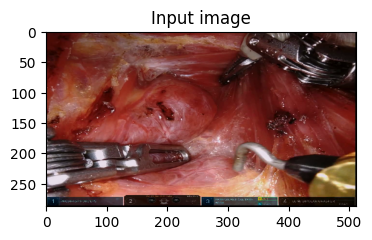

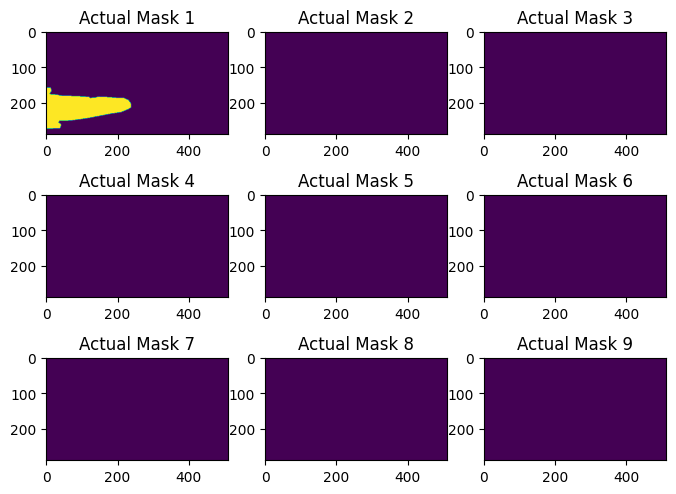

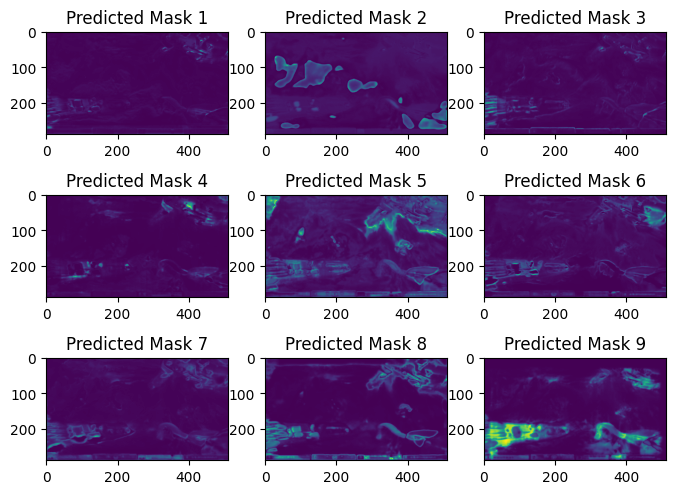

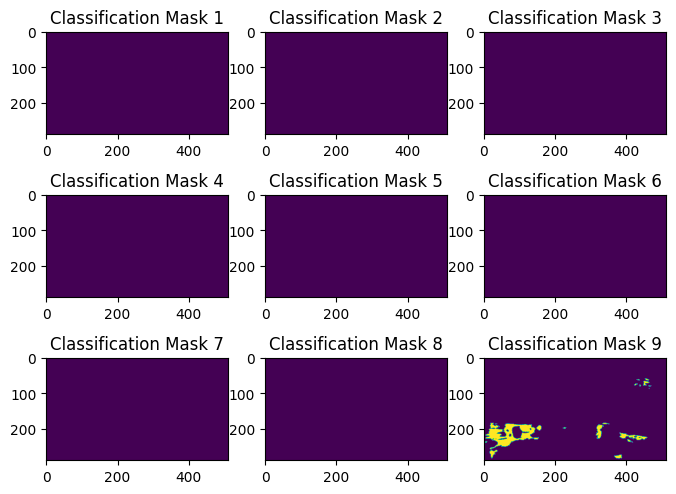

metrics: [0.         0.84374997 0.421875   0.4904074  0.49041221]
scores : 0.4629944386429399
real_score : 0.4629973208586517
Epoch Time : 2223.841061115265


AttributeError: 'list' object has no attribute 'save'

In [34]:
from IPython.display import clear_output

max_epochs = 50

# save loss values for plot
loss_history = [[None]] * 9
metric_history = [[None]] * 9
global_step = 0 # step 수 정의 (선택)
print_count = 10 # tf.gradient_tape
save_epochs = 2 # tf.gradient_tape
#batch_step = (num_train_examples // batch_size) + (0 if num_train_examples % batch_size == 0 else 1)


for epoch in range(max_epochs):
    epoch_time = time.time()
    for num in range(9):
        print(num, end='. ')
        for idx, (filename, width, height, images, labels, cls) in enumerate(train_dataset[num]): # 데이터 로드 파트

            labels_no = tf.zeros((filename.shape[0],288,512,1))
            cls_no = tf.expand_dims(tf.zeros(filename.shape[0]),-1)

            start_time = time.time()
            global_step = global_step + 1
            
            rand_int = (num + idx) % 9
            
            with tf.GradientTape(persistent=True) as tape: # 모델 학습 파트
                predictions, pred_cls = model[num](images, training=True) # [batch_size, 256,256,3]
                predictions_no, pred_cls_no = model[rand_int](images, training=True) # [batch_size, 256,256,3]
                #predictions_no2, pred_cls_no2 = model[rand_int2](images, training=True) # [batch_size, 256,256,3]
            
                #predictions = tf.expand_dims(tf.argmax(predictions,axis=-1),-1)
                loss = bce_dice_loss(labels, predictions) # label [batch_size, 256, 256, 1]
                #loss = bce_dice_loss(labels, predictions * tf.reshape(tf.round(pred_cls),[pred_cls.shape[0],1,1,1]))
                loss += bce_loss(cls, pred_cls)
                
                loss_no = bce_dice_loss(labels_no, predictions_no)
                loss_no += bce_loss(cls_no, pred_cls_no)
                
                #loss_no2 = bce_dice_loss(labels_no, predictions_no2)
                #loss_no2 += bce_loss(cls_no, pred_cls_no2)
                
            # 가중치 업데이트 파트
            loss_history[num].append(loss)
            gradients = tape.gradient(loss, model[num].trainable_variables)
            gradients_no = tape.gradient(loss_no, model[rand_int].trainable_variables)
            #gradients_no2 = tape.gradient(loss_no2, model[rand_int2].trainable_variables)

            optimizer[num].apply_gradients(zip(gradients, model[num].trainable_variables))
            optimizer[rand_int].apply_gradients(zip(gradients_no, model[rand_int].trainable_variables))
            #optimizer[rand_int2].apply_gradients(zip(gradients_no2, model[rand_int2].trainable_variables))
            del labels_no
            del cls_no
            
            # 학습 상태 출력
    epoch_duration = time.time() - epoch_time
    print("Epoch Time :", epoch_duration)
    
    num = np.random.randint(9)
    mean = []
    
    # print sample image                     
    for filename, width, height, test_images, test_label, test_cls in test_dataset[num].take(1):
        clear_output(wait=True)
        sample = 0
        print(filename.numpy()[sample].decode('utf-8').rpartition('.')[0]+'.png')
        
        predictions = [None] * 9
        pred_cls = [None] * 9
        
        for i in range(9):
            predictions[i], pred_cls[i] = model[i](test_images, training=False)
        
        test_class = np.array([[0] * 9] * batch_size)
        test_class[:,num] = tf.squeeze(test_cls)
        
        test_labels = np.zeros((batch_size, 288,512,9))
        test_labels[:,:,:,num] = tf.squeeze(test_label)
        
        predictions = tf.concat(predictions,axis=-1)
        pred_cls = tf.concat(pred_cls,axis=-1)
        test_cls = np.array(test_class)
        print('cls :', test_cls[sample])
        print('pred :', pred_cls.numpy().round().astype(int)[sample])
        
        plt.figure(figsize=(4, 3))
        plt.subplot(1, 1, 1)
        plt.imshow(test_images[sample,:,:,:])
        plt.title("Input image")
        plt.show()

        plt.figure(figsize=(8, 6))
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.imshow(test_labels[sample,:,:,i])
            plt.title("Actual Mask "+str(i+1))
        plt.show()

        plt.figure(figsize=(8, 6))
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.imshow(predictions[sample,:,:,i])
            plt.title("Predicted Mask "+str(i+1))
        plt.show()

        plt.figure(figsize=(8, 6))
        for i in range(9):
            plt.subplot(3, 3, i+1)
            plt.imshow(tf.round(predictions[sample,:,:,i]) * tf.round(pred_cls[sample,i]))
            plt.title("Classification Mask "+str(i+1))
        plt.show()
        
        _, _, _, c_iou = metric_function(test_labels, test_cls, tf.round(predictions) * tf.reshape(tf.round(pred_cls),[pred_cls.shape[0],1,1,9]), pred_cls)

        sen, spe, m_auc, iou = metric_function(test_labels, test_cls, predictions, pred_cls)
        mean.append([sen, spe, m_auc, iou, c_iou])

    mean = np.array(mean)
    mean = np.mean(mean,axis=0)

    metric_history[num].append([epoch, mean[0], mean[1], mean[2], mean[3], mean[4]])

    score = mean[3]*0.6 + (mean[0]*0.1 + mean[1]*0.1 + mean[2]*0.2)
    real_score = mean[4]*0.6 + (mean[0]*0.1 + mean[1]*0.1 + mean[2]*0.2)
    print("metrics: {}".format(mean))
    print("scores : {}".format(score))
    print("real_score : {}".format(real_score))
    
    print("Epoch Time :", epoch_duration)
    
# saving (checkpoint) the model periodically
    if (epoch+1) % save_epochs == 0:
        checkpoint[i].save(checkpoint_prefix[i])

In [35]:
for i in range(9):
    checkpoint[i] = tf.train.Checkpoint(optimizer=optimizer[i],
                               model=model[i])
    checkpoint[i].save(checkpoint_prefix[i])

In [ ]:
plt.figure(figsize=(8, 8))
for i in range(9):
    loss_history = np.asarray(loss_history[i])
    plt.subplot(3,3,i+1)
    plt.plot(loss_history[:,0], loss_history[:,1])
plt.show()

In [ ]:
metric_history = np.asarray(metric_history)
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.plot(metric_history[:,0], metric_history[:,1])
plt.title('sensitivity')

plt.subplot(2, 3, 2)
plt.plot(metric_history[:,0], metric_history[:,2])
plt.title('specificity')

plt.subplot(2, 3, 3)
plt.plot(metric_history[:,0], metric_history[:,3])
plt.title('AUC')

plt.subplot(2, 3, 4)
plt.plot(metric_history[:,0], metric_history[:,4])
plt.title('iou')

plt.subplot(2, 3, 5)
plt.plot(metric_history[:,0], metric_history[:,5])
plt.title('real_iou')

plt.subplot(2, 3, 6)
plt.plot(metric_history[:,0], metric_history[:,5]*0.6 + metric_history[:,1]*0.1 + metric_history[:,2]*0.1 + metric_history[:,3]*0.2)
plt.title('real_score')
plt.show()

In [ ]:
import cv2
import pandas as pd

mean = []

# print sample image                     
for dsf, (filename, width, height, images, labels, cls) in enumerate(test_dataset):
    predictions, pred_cls = model(images, training=False)
    
    mask = np.zeros((predictions.shape[0],288,512,9))
    
    for sample in range(predictions.shape[0]):
        
        no_found = True
        for idx, img_cls in enumerate(pred_cls.numpy().round()[sample]):
            sample_label = predictions[sample].numpy().round()[:,:,idx]

            if(img_cls==1 and sample_label.sum()>1500):
                
                img = (sample_label*255).astype(np.uint8)
                
                contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
                
                maximum = 0
                maximum_iter = 0
                for i, cnt in enumerate(contours):
                    if(maximum < cv2.contourArea(cnt)):
                        maximum = cv2.contourArea(cnt)
                        maximum_iter = i
                points = contours[maximum_iter]

                for i in range(100):
                    pl = cv2.approxPolyDP(points, (i/100)*cv2.arcLength(points, True), True)
                    if(pl.shape[0]<=10):
                        break
                pl = pl.squeeze()

                for i in range(10-len(pl)):
                    pl = np.concatenate((pl, pl[0].reshape(1,2)), axis=0)

                pl = [(x[0],x[1]) for x in pl]
                _img = Image.new('L', (512,288), 0)
                ImageDraw.Draw(_img).polygon(pl, outline=1, fill=1)
                mask[sample,:,:,idx] = np.array(_img)#tf.image.resize(np.expand_dims(np.array(_img), axis=-1),[288,512]).numpy().squeeze()

    sen, spe, m_auc, iou = metric_function(labels, cls, mask, tf.round(pred_cls).numpy())
    mean.append(sen*0.1 + spe*0.1 + m_auc*0.2 + iou*0.6)

    print('score :',sen*0.1 + spe*0.1 + m_auc*0.2 + iou*0.6)

In [ ]:
#테스트 스코어
np.mean(np.array(mean))

In [ ]:
inference_list = os.listdir(inference_data)
inference_list.sort()
inference_list

In [ ]:
def _process_inference(filename):
    # We map this function onto each pathname pair
    img_path = inference_data+'/'+filename
    
    img_str = tf.io.read_file(img_path)
    img = tf.image.decode_png(img_str, channels=3) # RGB
    
    width = tf.cast(img.shape[0], dtype=tf.uint16)
    height = tf.cast(img.shape[1], dtype=tf.uint16)
    
    resize = [288, 512]
    img = tf.image.resize(img, resize)
    
    scale = 1 / 255.                
    img = tf.cast(img, dtype=tf.float32) * scale
    filename = tf.cast(filename, dtype=tf.string)
    
    return filename, width, height, img

In [ ]:

def gen_infer():
    for i in inference_list:
        yield _process_inference(i)
    
def dataset_infer(batch_size=4):
    
    dataset = tf.data.Dataset.from_generator(gen_infer, (tf.string, tf.uint16, tf.uint16, tf.float32), ((), (), (), (288,512,3)))
    
    dataset = dataset.batch(batch_size)
    return dataset



In [ ]:
infer_dataset = dataset_infer()

In [ ]:
import cv2
import pandas as pd

results = pd.DataFrame(columns=['file', 'class', 'x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8', 'x9', 'y9', 'x10', 'y10'])
count = 0

# print sample image                     
for filename, width, height, images in infer_dataset:
    predictions, pred_cls = model(images, training=False)
    for sample in range(predictions.shape[0]):
        no_found = True
        for idx, img_cls in enumerate(pred_cls.numpy().round()[sample]):
            sample_label = predictions[sample].numpy().round()[:,:,idx]
            if(img_cls==1 and sample_label.sum()>300):
                img = tf.image.resize(np.expand_dims(sample_label, axis=-1), [width.numpy()[sample], height.numpy()[sample]])
                img = img.numpy()
                img = (img*255).astype(np.uint8)
                
                contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
                
                maximum = 0
                maximum_iter = 0
                for i, cnt in enumerate(contours):
                    if(maximum < cv2.contourArea(cnt)):
                        maximum = cv2.contourArea(cnt)
                        maximum_iter = i
                points = contours[maximum_iter]

                for i in range(100):
                    pl = cv2.approxPolyDP(points, (i/100)*cv2.arcLength(points, True), True)
                    if(pl.shape[0]<=10):
                        break
                pl = pl.squeeze()

                for i in range(10-len(pl)):
                    pl = np.concatenate((pl, pl[0].reshape(1,2)), axis=0)
                pl = pl.flatten()
                result = [filename.numpy()[sample].decode('utf-8').rpartition('.')[0], idx]
                result.extend(pl)
                
                results.loc[count] = result
                no_found = False
                count += 1
        if(no_found):
            result = [filename.numpy()[sample].decode('utf-8').rpartition('.')[0]]
            result.extend([None] * 21)
            results.loc[count] = result
            count += 1

In [ ]:
results

In [ ]:
results.to_csv('results.csv',index = False)